![alt text](img/1.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import scipy.io as sio
%matplotlib inline

In [2]:
#loading .mat format data
raw_data=sio.loadmat('ex6data1.mat')


In [3]:
dt = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
dt['y'] = raw_data['y']

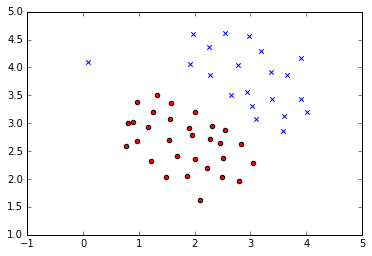

In [4]:
for i in range(dt.shape[0]):
    if dt.iloc[i,2]==0:
        plt.scatter(dt.iloc[i,0],dt.iloc[i,1],c='red',marker='o')
    if dt.iloc[i,2]==1:
        plt.scatter(dt.iloc[i,0],dt.iloc[i,1],c='blue',marker='x')


In [5]:
from sklearn import svm  

In [6]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)  
svc.fit(dt[['X1', 'X2']], dt['y']) 
svc.score(dt[['X1', 'X2']], dt['y'])  

0.98039215686274506

In [7]:
svc1 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
svc1.fit(dt[['X1', 'X2']], dt['y']) 
svc1.score(dt[['X1', 'X2']], dt['y']) 

1.0

From the above two different varying C parameters we can clearly understand the score is perfect when we have a higher C value.

![alt text](img/2.png)

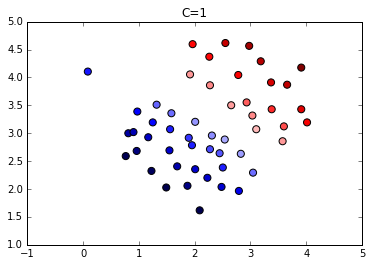

In [8]:
dt['SVM_Confidence'] = svc.decision_function(dt[['X1', 'X2']])
plt.scatter(dt['X1'], dt['X2'], s=50,c=dt['SVM_Confidence'], cmap='seismic')
plt.title('C=1')

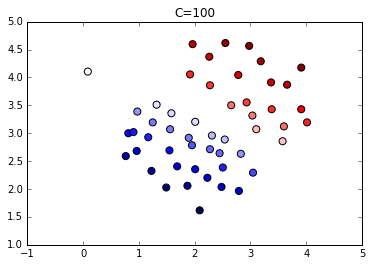

In [9]:
dt['SVM1_Confidence'] = svc1.decision_function(dt[['X1', 'X2']])
plt.scatter(dt['X1'], dt['X2'],s=50, c=dt['SVM1_Confidence'], cmap='seismic')
plt.title('C=100')

In the first image the points near the boundary are a strong red or blue, indicating that they're a solid distance from the hyperplane. This is not the case in the second image, where a number of points are nearly white, indicating that they are directly adjacent to the hyperplane.

In [10]:
dt.head()

,X1,X2,y,SVM_Confidence,SVM1_Confidence
0,1.9643,4.5957,1,0.798634,3.891410
1,2.2753,3.8589,1,0.380977,2.040752
2,2.9781,4.5651,1,1.373308,5.075615
3,2.9320,3.5519,1,0.518741,1.933785
4,3.5772,2.8560,1,0.332158,0.628685
